*   Nama : **Virgiawan Teguh Kusuma**
*   Email : **181240000833@unisnu.ac.id**
*   Domisili : **Kabupaten Jepara, Jawa Tengah**

In [1]:
# import library 
import zipfile, os
from google.colab import drive
import tensorflow as tf
from tensorflow import keras

!pip install split-folders
import splitfolders
from sklearn.model_selection import train_test_split

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model
import numpy as np
from google.colab import files
import matplotlib.image as mpimg

In [2]:
# load google drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
# extract file masker.zip
maskerZip = '/content/drive/MyDrive/masker2.zip'
maskerZipRef = zipfile.ZipFile(maskerZip, 'r')
maskerZipRef.extractall('/content')
maskerZipRef.close()

In [19]:
# list directory
os.listdir('/content/Dataset')

['mask_weared_incorrect', 'with_mask', 'without_mask']

In [20]:
# inisialisasi path test, train, validation dll
basePath = '/content/Dataset'
result = '/content/Dataset/result'
testPath = '/content/Dataset/result/test'
trainPath = '/content/Dataset/result/train'
valPath = '/content/Dataset/result/val'

In [21]:
splitfolders.ratio(basePath, 
                   output=result, 
                   seed=1337, 
                   ratio=(.8, .2), 
                   group_prefix=None)

trainWithMaskPath = os.path.join(trainPath, 'with_mask')
trainWithMaskPath = os.path.join(trainPath, 'mask_weared_incorect')
trainWithoutMaskPath = os.path.join(trainPath, 'without_mask')

valWithMaskPath = os.path.join(valPath, 'with_mask')
valWithMaskPath = os.path.join(valPath, 'mask_weared_incorect')
valWithoutMaskPath = os.path.join(valPath, 'without_mask')

Copying files: 8982 files [00:01, 4621.64 files/s]


In [56]:
# augmentasi gambar dengan ImageDataGenerator
trainDataGenerator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode= 'nearest'
    )

testDataGenerator = ImageDataGenerator(
    rescale = 1.0/255,
    rotation_range=20,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode= 'nearest'
    )

In [59]:
trainGenerator = trainDataGenerator.flow_from_directory(
    directory=trainPath,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
    )

valGenerator = testDataGenerator.flow_from_directory(
    directory=valPath,
    target_size=(64,64),
    batch_size=32,
    class_mode='categorical'
    )

Found 7185 images belonging to 3 classes.
Found 1797 images belonging to 3 classes.


In [13]:
print(trainGenerator.class_indices)

{'WithMask': 0, 'WithoutMask': 1, 'result': 2}


In [31]:
# model sequential
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64, 64, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(3, activation='softmax')
])

In [32]:
# menggunakan callback agar pengujian berhenti jika mae mencapai target
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)

In [33]:
# compile model
model.compile(loss='categorical_crossentropy', 
              optimizer=tf.optimizers.Adam(), 
              metrics=['accuracy']
              )

In [34]:
# train model dengan fit
history = model.fit(trainGenerator,
                    steps_per_epoch=25,
                    epochs=20, 
                    validation_data=valGenerator,
                    verbose=2,
                    callbacks=[callback]
                    )

Epoch 1/20
25/25 - 13s - loss: 0.7767 - accuracy: 0.6325 - val_loss: 0.5673 - val_accuracy: 0.7140
Epoch 2/20
25/25 - 12s - loss: 0.4526 - accuracy: 0.8225 - val_loss: 0.5499 - val_accuracy: 0.8203
Epoch 3/20
25/25 - 12s - loss: 0.4305 - accuracy: 0.8487 - val_loss: 0.4759 - val_accuracy: 0.8097
Epoch 4/20
25/25 - 12s - loss: 0.3242 - accuracy: 0.8863 - val_loss: 0.3132 - val_accuracy: 0.8898
Epoch 5/20
25/25 - 12s - loss: 0.2860 - accuracy: 0.9025 - val_loss: 0.3946 - val_accuracy: 0.8297
Epoch 6/20
25/25 - 12s - loss: 0.3061 - accuracy: 0.8925 - val_loss: 0.1988 - val_accuracy: 0.9288
Epoch 7/20
25/25 - 12s - loss: 0.2687 - accuracy: 0.9083 - val_loss: 0.3121 - val_accuracy: 0.8870
Epoch 8/20
25/25 - 12s - loss: 0.2214 - accuracy: 0.9287 - val_loss: 0.2222 - val_accuracy: 0.9132
Epoch 9/20
25/25 - 12s - loss: 0.2007 - accuracy: 0.9200 - val_loss: 0.1922 - val_accuracy: 0.9299
Epoch 10/20
25/25 - 12s - loss: 0.2225 - accuracy: 0.9225 - val_loss: 0.1706 - val_accuracy: 0.9438
Epoch 11/

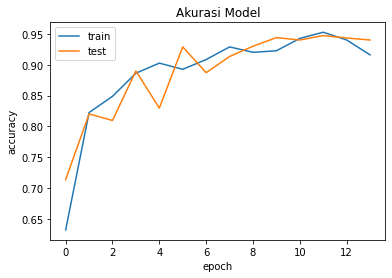

In [35]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Akurasi Model')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

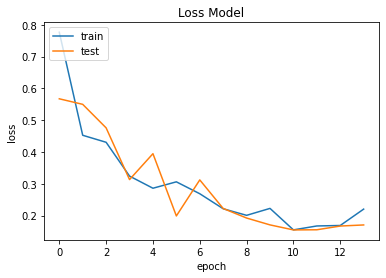

In [36]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss Model')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')

plt.show()

Saving 89.png to 89.png
89.png
[0]
[[1. 0. 0.]]
Tidak Pakai Masker dengan Benar


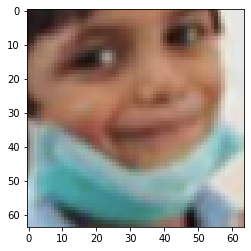

In [51]:
# memprediksi gambar
%matplotlib inline

uploaded = files.upload()
for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, target_size=(64, 64))
  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=32)
  predIdxs = np.argmax(classes, axis=1)
  
  print(fn)
  print(predIdxs)
  print(classes)
  if classes[0][1]>0:
    print('Pakai Masker')
  elif classes[0][2]>0:
    print('Tidak Pakai Masker')
  else:
    print('Tidak Pakai Masker dengan Benar')


In [52]:
# konversi model TFLiteConverter
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

INFO:tensorflow:Assets written to: /tmp/tmprf0bl60o/assets


In [53]:
# simpan model dengan format .tflite
with tf.io.gfile.GFile('masker.tflite', 'wb') as f:
  f.write(tflite_model)